In [1]:
# importing necessary library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# importing data
df=pd.read_csv('C:/Users/sande/OneDrive/Desktop/datasets/spam.csv',encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# checking null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.shape

(5572, 5)

In [6]:
# dropping columns as there are more then 80% null values present in it
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# rename column name 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# duplicate data 
df.duplicated().sum()

403

In [13]:
# removing duplicate data
df=df.drop_duplicates(keep='first')

In [14]:
df.shape

(5169, 2)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()

In [17]:
# converting categorical data into numeric
df['target']=le.fit_transform(df['target'])

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

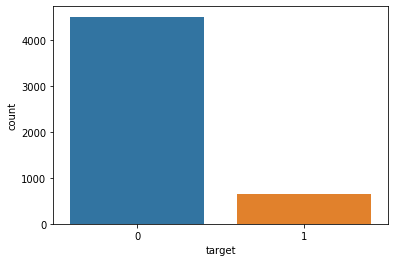

In [20]:
sns.countplot(x=df['target'])
plt.show()

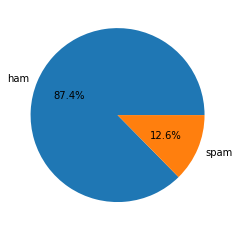

In [21]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.show()

As we can see here the dataset is imbalanced

Handling imbalanced data 

In [22]:
from sklearn.utils import resample

In [23]:
df_majority = df[(df['target']==0)] 
df_minority = df[(df['target']==1)] 

In [24]:
df_minority_upsampled=resample(df_minority,replace=True,n_samples=4516,random_state=None)

In [25]:
df=pd.concat([df_minority_upsampled,df_majority],ignore_index=True)

In [26]:
df.shape

(9032, 2)

In [27]:
df['target'].value_counts()

1    4516
0    4516
Name: target, dtype: int64

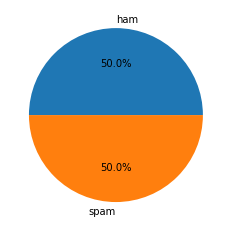

In [28]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.show()

In [29]:
df.duplicated().sum()

3863

In [30]:
df=df.sample(frac=1).reset_index(drop=True)

In [31]:
df.head()

,target,text
0,0,Long time. You remember me today.
1,1,You will be receiving this week's Triple Echo ...
2,1,FreeMsg:Feelin kinda lnly hope u like 2 keep m...
3,1,"Shop till u Drop, IS IT YOU, either 10K, 5K, å..."
4,1,Urgent Ur å£500 guaranteed award is still uncl...


In [32]:
# Text Preprocessing
import nltk

In [33]:
# creating new feature for analyzing 
df['num_characters']=df['text'].apply(len)

In [34]:
# creating new feature for analyzing
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
# creating new feature for analyzing
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,Long time. You remember me today.,33,8,2
1,1,You will be receiving this week's Triple Echo ...,73,15,2
2,1,FreeMsg:Feelin kinda lnly hope u like 2 keep m...,160,37,2
3,1,"Shop till u Drop, IS IT YOU, either 10K, 5K, å...",158,35,2
4,1,Urgent Ur å£500 guaranteed award is still uncl...,161,16,2


In [37]:
df.describe()

,target,num_characters,num_words,num_sentences
count,9032.000000,9032.000000,9032.000000,9032.000000
mean,0.500000,103.859942,22.146811,2.376550
std,0.500028,56.276277,11.857453,1.519823
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,49.000000,12.000000,1.000000
50%,0.500000,114.500000,24.000000,2.000000
75%,1.000000,152.000000,30.000000,3.000000
max,1.000000,910.000000,219.000000,38.000000


In [38]:
# spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,137.260629,27.335252,2.937555
std,30.443173,6.924693,1.459410
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,28.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [39]:
# ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.958370,1.815545
std,56.358207,13.395014,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


As average number of character per sentence we can see in spam is more as compare to ham and even the number of words in sentence is more in spam as compared to ham. So from here we can make assumption that if text is long then that text is spam else ham.

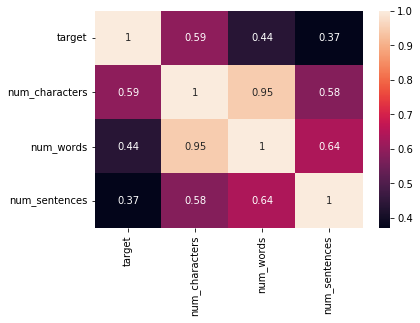

In [40]:
sns.heatmap(df.corr(),annot=True)
plt.show()

Features number of character and number of words is highly correlated with each other 

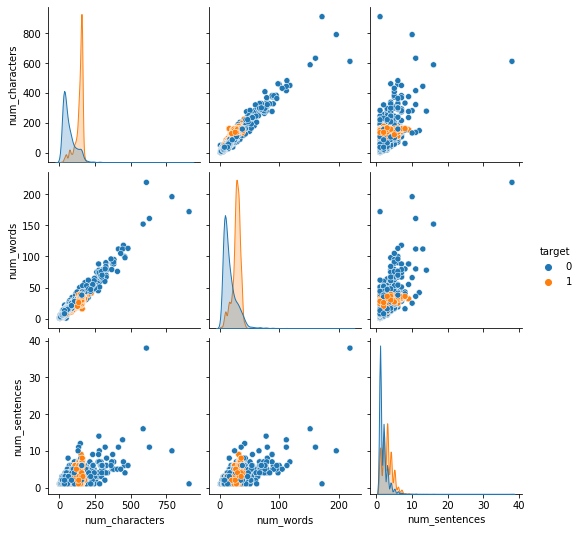

In [41]:
sns.pairplot(df,hue='target')
plt.show()

In [42]:
from nltk.corpus import stopwords

In [43]:
# stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
import string

In [45]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
# for stemming words
from nltk.stem import PorterStemmer

In [47]:
ps=PorterStemmer()

In [48]:
def func1(text):
    text=text.lower()    # lower the text
    text=nltk.word_tokenize(text)     # convert that text into words
    y=[]
    for i in text:
        if i.isalnum():  # Taking only those words which is alpha numeric
            y.append(i)   # storing in list
    z=[]
    for i in y:
        if i not in stopwords.words('english') and i not in string.punctuation:   # taking only those words which are not in stopwords and also remove the special character
            z.append(i)        # storing in new list
    l=[]
    for i in z:
        l.append(ps.stem(i))      # applying stemming
    return ' '.join(l)          # converting list into text again

In [49]:
df['transform_text']=df['text'].apply(func1)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,Long time. You remember me today.,33,8,2,long time rememb today
1,1,You will be receiving this week's Triple Echo ...,73,15,2,receiv week tripl echo rington shortli enjoy
2,1,FreeMsg:Feelin kinda lnly hope u like 2 keep m...,160,37,2,freemsg feelin kinda lnli hope u like 2 keep c...
3,1,"Shop till u Drop, IS IT YOU, either 10K, 5K, å...",158,35,2,shop till u drop either 10k 5k cash travel vou...
4,1,Urgent Ur å£500 guaranteed award is still uncl...,161,16,2,urgent ur guarante award still unclaim call 09...


In [51]:
df.iloc[4]

target                                                            1
text              Urgent Ur å£500 guaranteed award is still uncl...
num_characters                                                  161
num_words                                                        16
num_sentences                                                     2
transform_text    urgent ur guarante award still unclaim call 09...
Name: 4, dtype: object

In [52]:
from wordcloud import WordCloud

In [53]:
# applying parameters
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [54]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=' '))

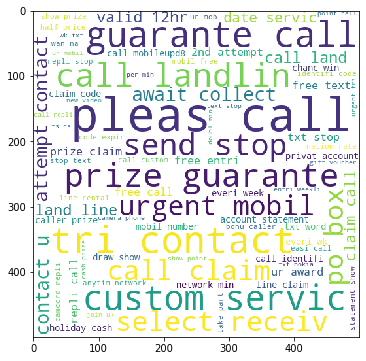

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [56]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=' '))

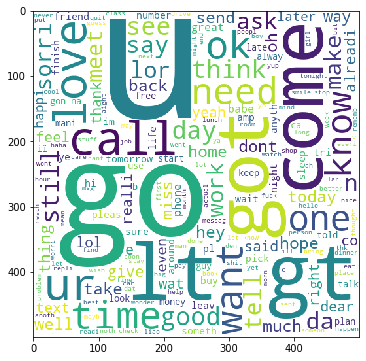

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [58]:
spam_corpus=[]
for i in df[df['target']==1]['transform_text'].tolist():
    for msg in i.split():
        spam_corpus.append(msg)

In [59]:
len(spam_corpus)

67696

In [60]:
from collections import Counter

In [61]:
# most commom words
Counter(spam_corpus).most_common(20)

[('call', 2281),
 ('free', 1278),
 ('2', 1072),
 ('txt', 954),
 ('u', 855),
 ('ur', 805),
 ('mobil', 798),
 ('text', 787),
 ('stop', 717),
 ('claim', 695),
 ('repli', 689),
 ('prize', 565),
 ('get', 505),
 ('4', 483),
 ('servic', 457),
 ('send', 449),
 ('new', 434),
 ('nokia', 417),
 ('contact', 409),
 ('urgent', 392)]

In [62]:
# converting into Dataframe
pd.DataFrame(Counter(spam_corpus).most_common(20))

,0,1
0,call,2281
1,free,1278
2,2,1072
3,txt,954
4,u,855
5,ur,805
6,mobil,798
7,text,787
8,stop,717
9,claim,695


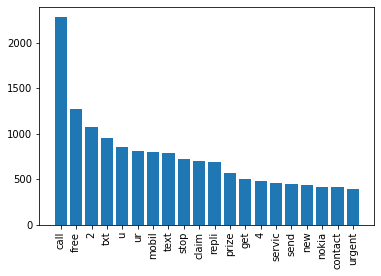

In [63]:
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

In [64]:
ham_corpus=[]
for i in df[df['target']==0]['transform_text'].tolist():
    for msg in i.split():
        ham_corpus.append(msg)

In [65]:
len(ham_corpus)

34773

In [66]:
# most common word
Counter(ham_corpus).most_common(20)

[('u', 871),
 ('go', 401),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 272),
 ('got', 236),
 ('know', 234),
 ('like', 234),
 ('call', 232),
 ('time', 217),
 ('good', 212),
 ('want', 208),
 ('ok', 207),
 ('love', 206),
 ('ur', 197),
 ('day', 184),
 ('need', 170),
 ('one', 164)]

In [67]:
# converting into Dataframe
pd.DataFrame(Counter(ham_corpus).most_common(20))

,0,1
0,u,871
1,go,401
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,272
7,got,236
8,know,234
9,like,234


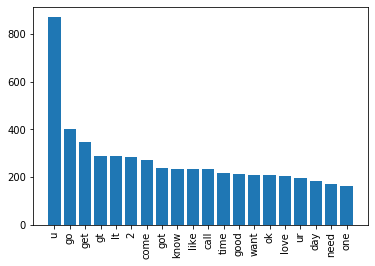

In [68]:
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

In [69]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,Long time. You remember me today.,33,8,2,long time rememb today
1,1,You will be receiving this week's Triple Echo ...,73,15,2,receiv week tripl echo rington shortli enjoy
2,1,FreeMsg:Feelin kinda lnly hope u like 2 keep m...,160,37,2,freemsg feelin kinda lnli hope u like 2 keep c...
3,1,"Shop till u Drop, IS IT YOU, either 10K, 5K, å...",158,35,2,shop till u drop either 10k 5k cash travel vou...
4,1,Urgent Ur å£500 guaranteed award is still uncl...,161,16,2,urgent ur guarante award still unclaim call 09...


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [72]:
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [73]:
x=tfidf.fit_transform(df['transform_text']).toarray()  # converting text to vector
x1=cv.fit_transform(df['transform_text']).toarray()     # converting text to vector

In [74]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
x1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [76]:
y=df['target'].values

In [77]:
y

array([0, 1, 1, ..., 1, 0, 0])

In [78]:
y.shape

(9032,)

In [79]:
x.shape

(9032, 6629)

In [80]:
x1.shape

(9032, 6629)

In [81]:
from sklearn.model_selection import train_test_split

In [102]:
# splitting data into train and test using tfidf
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=None)

In [83]:
# splitting data into train and test using countvectorizer
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y,test_size=0.2,random_state=None)

In [84]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [85]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

using countvectorizer

In [86]:
gnb.fit(x1_train,y1_train)
y_pred=gnb.predict(x1_test)
print(accuracy_score(y1_test,y_pred))
print(confusion_matrix(y1_test,y_pred))
print(precision_score(y1_test,y_pred))

0.9214167127836193
[[753 142]
 [  0 912]]
0.8652751423149905


In [87]:
mnb.fit(x1_train,y1_train)
y_pred=mnb.predict(x1_test)
print(accuracy_score(y1_test,y_pred))
print(confusion_matrix(y1_test,y_pred))
print(precision_score(y1_test,y_pred))

0.9723298284449363
[[865  30]
 [ 20 892]]
0.9674620390455532


In [88]:
bnb.fit(x1_train,y1_train)
y_pred=bnb.predict(x1_test)
print(accuracy_score(y1_test,y_pred))
print(confusion_matrix(y1_test,y_pred))
print(precision_score(y1_test,y_pred))

0.9806308799114555
[[893   2]
 [ 33 879]]
0.9977298524404086


Using tfidf vectorizer

In [89]:
gnb.fit(x_train,y_train)
ypred1=gnb.predict(x_test)
print(accuracy_score(y_test,ypred1))
print(confusion_matrix(y_test,ypred1))
print(precision_score(y_test,ypred1))

0.9236303265080243
[[786 138]
 [  0 883]]
0.8648383937316356


In [90]:
mnb.fit(x_train,y_train)
ypred1=mnb.predict(x_test)
print(accuracy_score(y_test,ypred1))
print(confusion_matrix(y_test,ypred1))
print(precision_score(y_test,ypred1))

0.9701162147205312
[[888  36]
 [ 18 865]]
0.9600443951165372


In [103]:
bnb.fit(x_train,y_train)
ypred1=bnb.predict(x_test)
print(accuracy_score(y_test,ypred1))
print(confusion_matrix(y_test,ypred1))
print(precision_score(y_test,ypred1))

0.9872717210846708
[[935   0]
 [ 23 849]]
1.0


we select bnb model using tfidf vectorizer as we are focusing mainly on precision and bnb has the higest precision i.e 1

In [105]:
ypred1

array([1, 0, 0, ..., 1, 0, 0])

In [106]:
import pickle

In [94]:
pickle.dump(tfidf,open('spam.pkl','wb'))
pickle.dump(bnb,open('ml_model.pkl','wb'))